<a href="https://colab.research.google.com/github/Ali-Hasan-Khan28/Computer-Vision/blob/main/LAB07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


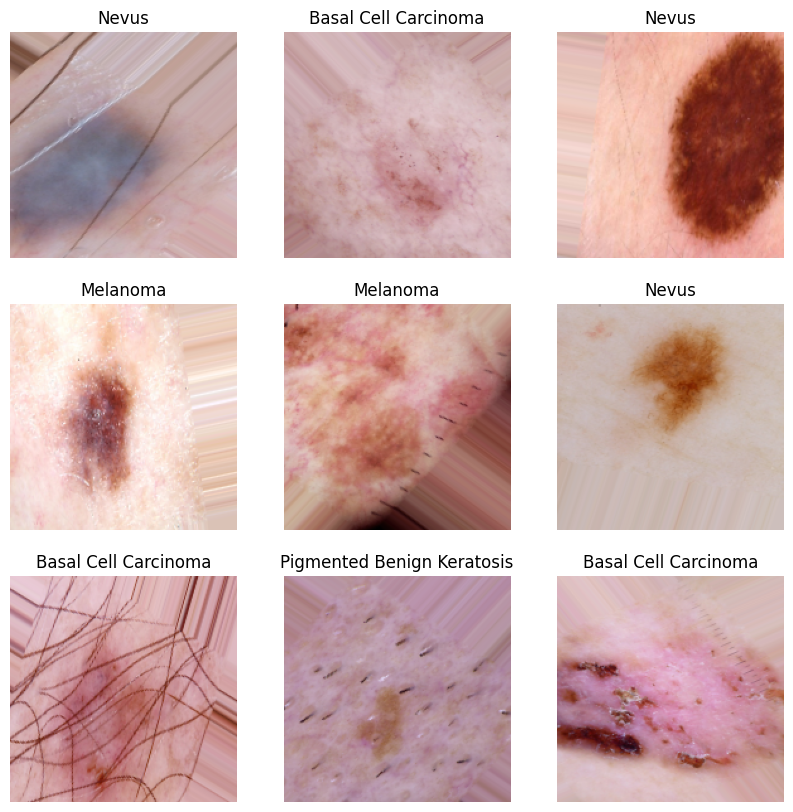

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

# Data Preprocessing and Dataset Creation
batch_size = 32
image_size = (180, 180)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Data Visualization
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])

def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

sample_training_images, _ = next(train_generator)
plot_images(sample_training_images, _)


Epoch 1/20
70/70 [==============================] - 54s 721ms/step - loss: 2.1656 - accuracy: 0.2608 - val_loss: 2.4738 - val_accuracy: 0.1525
Epoch 2/20
70/70 [==============================] - 49s 700ms/step - loss: 1.7453 - accuracy: 0.3725 - val_loss: 2.2578 - val_accuracy: 0.2458
Epoch 3/20
70/70 [==============================] - 48s 683ms/step - loss: 1.6399 - accuracy: 0.4216 - val_loss: 2.2883 - val_accuracy: 0.2034
Epoch 4/20
70/70 [==============================] - 49s 700ms/step - loss: 1.5928 - accuracy: 0.4372 - val_loss: 2.1223 - val_accuracy: 0.3305
Epoch 5/20
70/70 [==============================] - 46s 662ms/step - loss: 1.5478 - accuracy: 0.4556 - val_loss: 2.2253 - val_accuracy: 0.3390
Epoch 6/20
70/70 [==============================] - 48s 686ms/step - loss: 1.5112 - accuracy: 0.4850 - val_loss: 2.1689 - val_accuracy: 0.3220
Epoch 7/20
70/70 [==============================] - 48s 682ms/step - loss: 1.4482 - accuracy: 0.4859 - val_loss: 2.4638 - val_accuracy: 0.3475

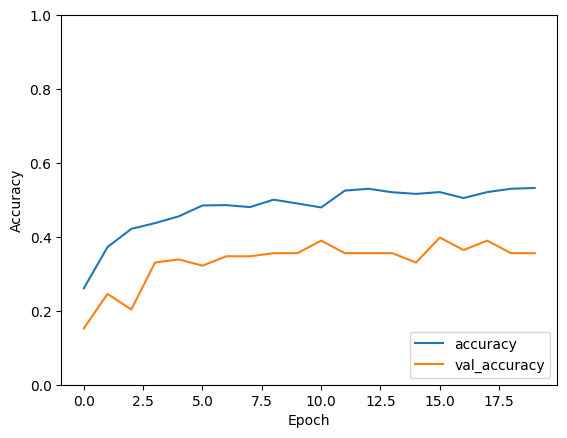

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the LeNet-5 model
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(9, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [5]:
import pandas as pd

In [6]:
from imblearn.over_sampling import RandomOverSampler

# Examine class distribution
class_counts = train_generator.classes
unique_classes, class_counts = np.unique(class_counts, return_counts=True)

class_distribution = dict(zip(unique_classes, class_counts))
print("Class Distribution in Training Data:")
print(class_distribution)

# Find the class with the least number of samples
least_samples_class = min(class_distribution, key=class_distribution.get)
print("Class with the least number of samples:", least_samples_class)

# Find classes dominating the data
dominant_classes = {k: v for k, v in class_distribution.items() if v == max(class_counts)}
print("Dominant classes:", dominant_classes)

# Handling class imbalances using Random Over-sampling
ros = RandomOverSampler(random_state=42)
# Convert train_generator.filepaths to numpy array and reshape
X_resampled, y_resampled = ros.fit_resample(np.array(train_generator.filepaths).reshape(-1, 1), train_generator.classes)

# Convert y_resampled to string format
y_resampled = y_resampled.astype(str)

# Model building and training on the augmented data
train_generator_augmented = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": X_resampled.flatten(), "class": y_resampled}),
    directory=train_dir,
    x_col="filename",
    y_col="class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Class Distribution in Training Data:
{0: 114, 1: 376, 2: 95, 3: 438, 4: 357, 5: 462, 6: 77, 7: 181, 8: 139}
Class with the least number of samples: 6
Dominant classes: {5: 462}
Found 4158 validated image filenames belonging to 9 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the LeNet-5 model
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(9, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history_augmented = model.fit(train_generator_augmented,
                              steps_per_epoch=len(train_generator_augmented),
                              epochs=20,
                              validation_data=test_generator,
                              validation_steps=len(test_generator))

Epoch 1/20
130/130 [==============================] - 83s 626ms/step - loss: 1.9386 - accuracy: 0.2299 - val_loss: 2.0698 - val_accuracy: 0.2797
Epoch 2/20
130/130 [==============================] - 79s 608ms/step - loss: 1.6795 - accuracy: 0.3381 - val_loss: 1.9625 - val_accuracy: 0.3051
Epoch 3/20
130/130 [==============================] - 85s 650ms/step - loss: 1.5733 - accuracy: 0.3737 - val_loss: 1.9158 - val_accuracy: 0.3136
Epoch 4/20
130/130 [==============================] - 80s 613ms/step - loss: 1.5709 - accuracy: 0.3783 - val_loss: 1.9273 - val_accuracy: 0.2203
Epoch 5/20
130/130 [==============================] - 80s 615ms/step - loss: 1.4965 - accuracy: 0.4115 - val_loss: 1.9155 - val_accuracy: 0.2966
Epoch 6/20
130/130 [==============================] - 81s 621ms/step - loss: 1.4847 - accuracy: 0.4233 - val_loss: 1.9820 - val_accuracy: 0.2797
Epoch 7/20
130/130 [==============================] - 79s 609ms/step - loss: 1.4711 - accuracy: 0.4262 - val_loss: 1.9454 - val_ac

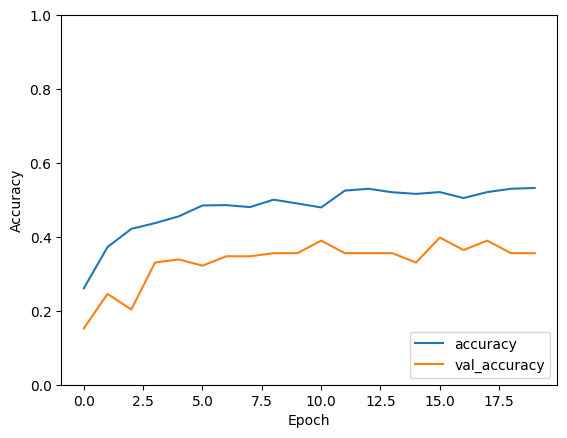

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# LeNet-5 Model
lenet_model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(9, activation='softmax')
])

# Compile LeNet-5 Model
lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Training LeNet-5 Model
lenet_history = lenet_model.fit(train_generator_augmented,
                                steps_per_epoch=len(train_generator_augmented),
                                epochs=30,
                                validation_data=test_generator,
                                validation_steps=len(test_generator))


Epoch 1/30
130/130 [==============================] - 90s 675ms/step - loss: 2.1999 - accuracy: 0.1441 - val_loss: 2.2196 - val_accuracy: 0.0593
Epoch 2/30
130/130 [==============================] - 80s 615ms/step - loss: 2.0412 - accuracy: 0.2306 - val_loss: 2.1544 - val_accuracy: 0.1441
Epoch 3/30
130/130 [==============================] - 81s 623ms/step - loss: 1.7936 - accuracy: 0.2987 - val_loss: 2.0904 - val_accuracy: 0.3220
Epoch 4/30
130/130 [==============================] - 80s 618ms/step - loss: 1.6552 - accuracy: 0.3374 - val_loss: 2.1053 - val_accuracy: 0.2542
Epoch 5/30
130/130 [==============================] - 84s 648ms/step - loss: 1.6317 - accuracy: 0.3475 - val_loss: 2.0474 - val_accuracy: 0.2712
Epoch 6/30
130/130 [==============================] - 79s 609ms/step - loss: 1.5828 - accuracy: 0.3615 - val_loss: 2.1021 - val_accuracy: 0.3220
Epoch 7/30
130/130 [==============================] - 86s 664ms/step - loss: 1.5280 - accuracy: 0.3891 - val_loss: 2.0575 - val_ac

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# AlexNet Model
alexnet_model = Sequential([
    Conv2D(96, (11, 11), strides=(4,4), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

# Compile AlexNet Model
alexnet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Training AlexNet Model
alexnet_history = alexnet_model.fit(train_generator_augmented,
                                    steps_per_epoch=len(train_generator_augmented),
                                    epochs=30,
                                    validation_data=test_generator,
                                    validation_steps=len(test_generator))


Epoch 1/30
130/130 [==============================] - 88s 627ms/step - loss: 2.2686 - accuracy: 0.1070 - val_loss: 2.1975 - val_accuracy: 0.1356
Epoch 2/30
130/130 [==============================] - 80s 616ms/step - loss: 2.1987 - accuracy: 0.1037 - val_loss: 2.1990 - val_accuracy: 0.1356
Epoch 3/30
130/130 [==============================] - 81s 621ms/step - loss: 2.1982 - accuracy: 0.1015 - val_loss: 2.1980 - val_accuracy: 0.1356
Epoch 4/30
130/130 [==============================] - 83s 636ms/step - loss: 2.1981 - accuracy: 0.1049 - val_loss: 2.1983 - val_accuracy: 0.1356
Epoch 5/30
130/130 [==============================] - 80s 617ms/step - loss: 2.1980 - accuracy: 0.1029 - val_loss: 2.1974 - val_accuracy: 0.1356
Epoch 6/30
130/130 [==============================] - 81s 624ms/step - loss: 2.1980 - accuracy: 0.1056 - val_loss: 2.1965 - val_accuracy: 0.1356
Epoch 7/30
130/130 [==============================] - 80s 616ms/step - loss: 2.1979 - accuracy: 0.1046 - val_loss: 2.1979 - val_ac

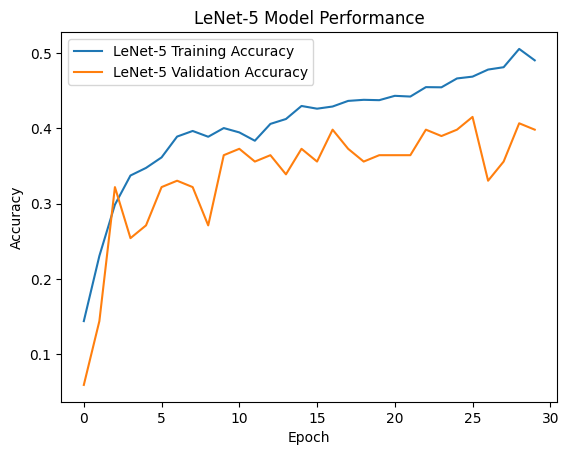

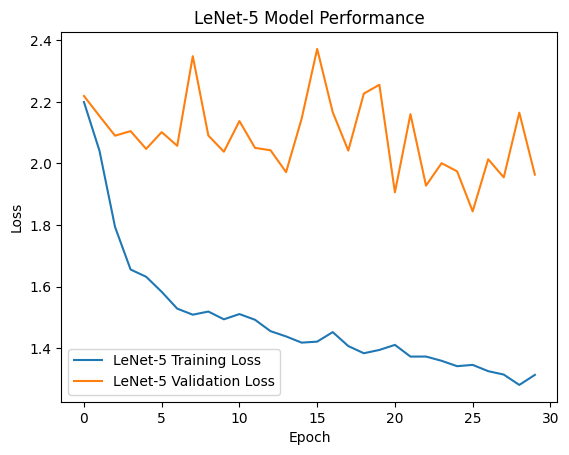

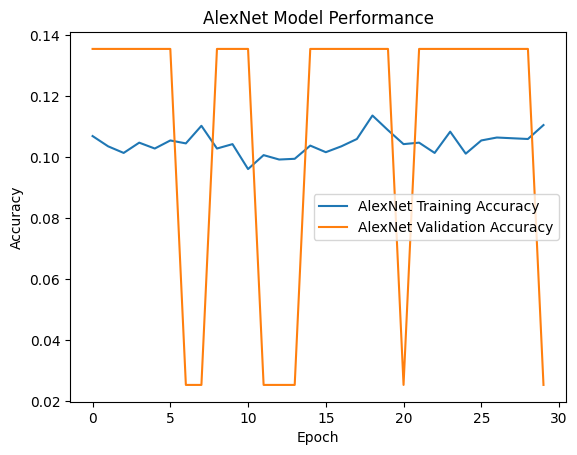

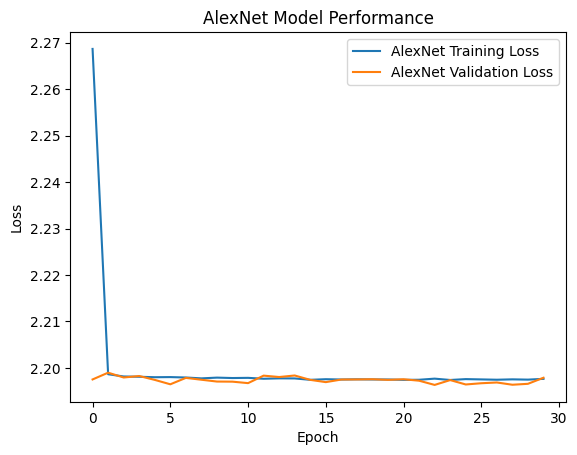

In [12]:
import matplotlib.pyplot as plt

# Plotting LeNet-5 Model Performance
plt.plot(lenet_history.history['accuracy'], label='LeNet-5 Training Accuracy')
plt.plot(lenet_history.history['val_accuracy'], label='LeNet-5 Validation Accuracy')
plt.title('LeNet-5 Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(lenet_history.history['loss'], label='LeNet-5 Training Loss')
plt.plot(lenet_history.history['val_loss'], label='LeNet-5 Validation Loss')
plt.title('LeNet-5 Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting AlexNet Model Performance
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Training Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Validation Accuracy')
plt.title('AlexNet Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(alexnet_history.history['loss'], label='AlexNet Training Loss')
plt.plot(alexnet_history.history['val_loss'], label='AlexNet Validation Loss')
plt.title('AlexNet Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
